In [1]:
# Basic imports 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#model imports

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings



In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### preparing X and Y column

In [4]:
X = df.drop('math_score', axis=1)
y = df['math_score']

In [5]:
X.shape, y.shape

((1000, 7), (1000,))

In [6]:
num_features = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(include=[object]).columns 

In [7]:
## Crete column transformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler, OneHotEncoder

StandardScaler = StandardScaler()
OneHotEncoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('StanderdScaler', StandardScaler, num_features),
        ('Onehotencoder', OneHotEncoder, cat_features)
    ]
    
)

In [8]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [9]:
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((800, 19), (200, 19), (800,), (200,))

### Create an Evaluation Function to give all metrices after model training

In [10]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    
    return mse, rmse, mae, r2

In [11]:
models ={
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model for training and testing data
    mse_train, rmse_train, mae_train, r2_train = evaluate_model(y_train, y_train_pred)
    mse_test, rmse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for tarining set")
    print(f"- Root mean squared error:{rmse_train:.4}")
    print(f"- Mean absolute error:{mae_train:.4}")
    print(f" Mean squared error:{mse_train:.4}")
    print(f"- R2 Score:{r2_train:.4}")

    print("----------------------------------------------------------------------")

    print("Model performance for testing set")  
    print(f"- Root mean squared error:{rmse_test:.4}")  
    print(f"- Mean absolute error:{mae_test:.4}")
    print(f"- Mean squared error:{mse_test:.4}")
    print(f"- R2 Score:{r2_test:.4}")
    r2_list.append(r2_test)


    print('='*20)
    print('\n')


KNN
Model performance for tarining set
- Root mean squared error:5.713
- Mean absolute error:4.518
 Mean squared error:32.64
- R2 Score:0.8552
----------------------------------------------------------------------
Model performance for testing set
- Root mean squared error:7.257
- Mean absolute error:5.631
- Mean squared error:52.66
- R2 Score:0.7836


DecisionTree
Model performance for tarining set
- Root mean squared error:0.2795
- Mean absolute error:0.01875
 Mean squared error:0.07812
- R2 Score:0.9997
----------------------------------------------------------------------
Model performance for testing set
- Root mean squared error:7.787
- Mean absolute error:6.215
- Mean squared error:60.65
- R2 Score:0.7508


RandomForest
Model performance for tarining set
- Root mean squared error:2.305
- Mean absolute error:1.84
 Mean squared error:5.315
- R2 Score:0.9764
----------------------------------------------------------------------
Model performance for testing set
- Root mean squared 

### Results

In [12]:
pd.DataFrame({'model': model_list, 'r2_score': r2_list}).sort_values(by='r2_score', ascending=False)

,model,r2_score
6,Ridge,0.880593
5,LinearRegression,0.880433
2,RandomForest,0.852577
3,AdaBoost,0.852491
7,Lasso,0.825320
0,KNN,0.783589
1,DecisionTree,0.750779
4,SVR,0.728600


### Linear Regression

In [13]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_test_pred = lin_model.predict(X_test)
lin_train_pred = lin_model.predict(X_train)

score = r2_score(y_test, lin_test_pred)*100
print(f"R2 Score for Linear Regression: {score:.2f}%")

R2 Score for Linear Regression: 88.04%


Text(0, 0.5, 'Predictions')

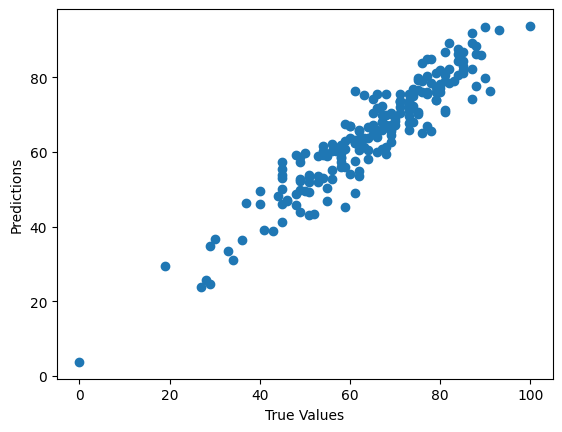

In [14]:
plt.scatter(y_test, lin_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')